<a href="https://colab.research.google.com/github/sakib927/My-Data-Science/blob/main/Xray(Pnemonia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sakib Ali Choudhary

This project is for constuction of a deep learning model to predict the rice leaf disease based on image recognition

The dataset used in collected from Kaggle

The link for the dataset :- https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
from keras.models import Sequential

In [43]:
import tensorflow as tf

import tensorflow_datasets as tfds


In [44]:
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import  RMSprop, adam
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from numpy import *
from PIL import Image
from tqdm import tqdm 
from skimage import io

In [45]:
path_test = "/content/drive/MyDrive/Xray_chest_images"
class_names = ['NORMAL','PNEUMONIA']
nb_classes = len(class_names)
image_size = (100,100)

In [46]:
def load_data():
    
    datasets = ['/content/drive/MyDrive/Xray_chest_images']
    images = []
    labels = []

    # iterate through training and test sets
    count =0
    for dataset in datasets:

        # iterate through folders in each dataset
        for folder in os.listdir(dataset):

            if folder in ['NORMAL']: label = 1
            elif folder in ['PNEUMONIA']: label = 2
            else : print('error')


            # iterate through each image in folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # get pathname of each image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open 
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, image_size)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    return images, labels

In [47]:
images, labels = load_data()

100%|██████████| 3875/3875 [01:04<00:00, 60.47it/s]


In [48]:
images, labels = shuffle(images, labels, random_state=20)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5)

In [49]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))
print("Number of testing examples: {}".format(n_test))

print("Training images are of shape: {}".format(train_images.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_images.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))
print("Test images are of shape: {}".format(test_images.shape))
print("Test labels are of shape: {}".format(test_labels.shape))

Number of training examples: 4172
Number of validation examples: 522
Number of testing examples: 522
Training images are of shape: (4172, 100, 100, 3)
Training labels are of shape: (4172,)
Validation images are of shape: (522, 100, 100, 3)
Validation labels are of shape: (522,)
Test images are of shape: (522, 100, 100, 3)
Test labels are of shape: (522,)


'from google. colab import files\nplt. savefig("abc.png")\nfiles. download("abc.png")'

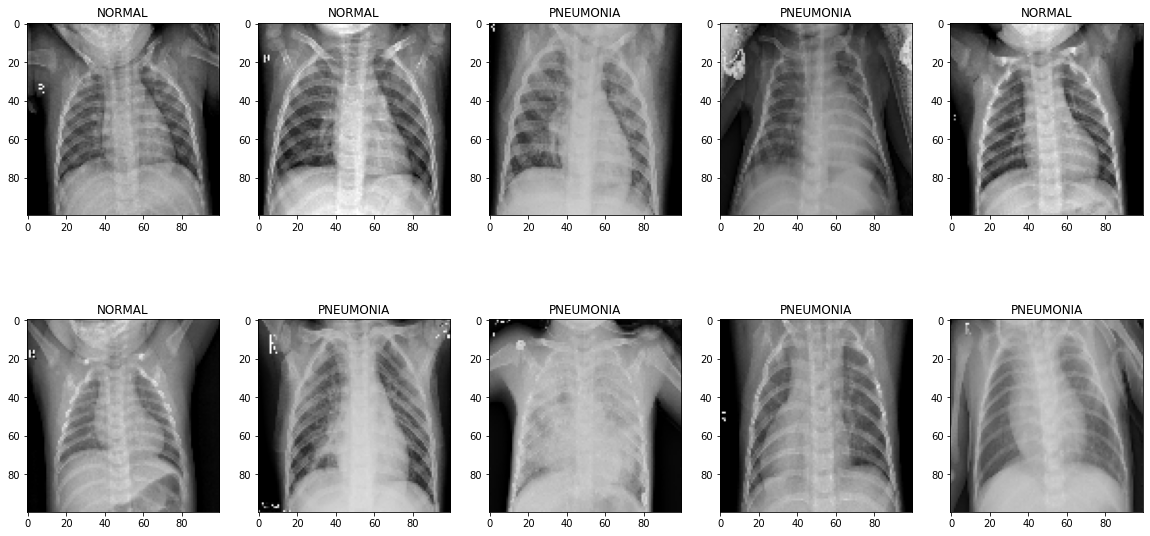

In [50]:
fig=plt.figure(figsize=(20,10))
for i in range(10):
  ax=fig.add_subplot(2,5,i+1)
  ax.imshow(np.squeeze(train_images[i].astype('uint8')))
  if 1==train_labels[i] : title_name = 'NORMAL'
  elif 2==train_labels[i]: title_name='PNEUMONIA'
  ax.set_title(title_name)

'''from google. colab import files
plt. savefig("abc.png")
files. download("abc.png")'''

In [11]:
train_images = train_images / 255.0 
val_images = val_images / 255.0
test_images = test_images / 255.0

In [12]:
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [13]:
nb_classes = 9
nb_epochs = 10
img_rows, img_columns =100, 100
img_channel = 5
nb_filters = 64
nb_pool =4
nb_conv = 5
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.swish,
                           input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.swish),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.swish),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.swish),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation= tf.nn.sigmoid),
    tf.keras.layers.Dense(9,  activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history2  = model.fit(train_images, train_labels, epochs = nb_epochs, verbose = 1, validation_data = (val_images, val_labels))

Epoch 1/10
131/131 [==============================] - 73s 552ms/step - loss: 0.6454 - accuracy: 0.7368 - val_loss: 0.5208 - val_accuracy: 0.7625
Epoch 2/10
131/131 [==============================] - 85s 647ms/step - loss: 0.4307 - accuracy: 0.7979 - val_loss: 0.2553 - val_accuracy: 0.9502
Epoch 3/10
131/131 [==============================] - 80s 614ms/step - loss: 0.2182 - accuracy: 0.9300 - val_loss: 0.1328 - val_accuracy: 0.9559
Epoch 4/10
131/131 [==============================] - 85s 653ms/step - loss: 0.1403 - accuracy: 0.9506 - val_loss: 0.1054 - val_accuracy: 0.9617
Epoch 5/10
131/131 [==============================] - 79s 605ms/step - loss: 0.1181 - accuracy: 0.9573 - val_loss: 0.0892 - val_accuracy: 0.9732
Epoch 6/10
131/131 [==============================] - 74s 564ms/step - loss: 0.1012 - accuracy: 0.9624 - val_loss: 0.0807 - val_accuracy: 0.9674
Epoch 7/10
131/131 [==============================] - 71s 542ms/step - loss: 0.0816 - accuracy: 0.9703 - val_loss: 0.0928 - val_ac

In [15]:
score = model.evaluate(test_images, test_labels, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.06427470594644547
Test accuracy:  0.9789271950721741


In [16]:
def plot_accuracy_loss_chart(history):
    epochs = [i for i in range(10)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(20,10)
    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

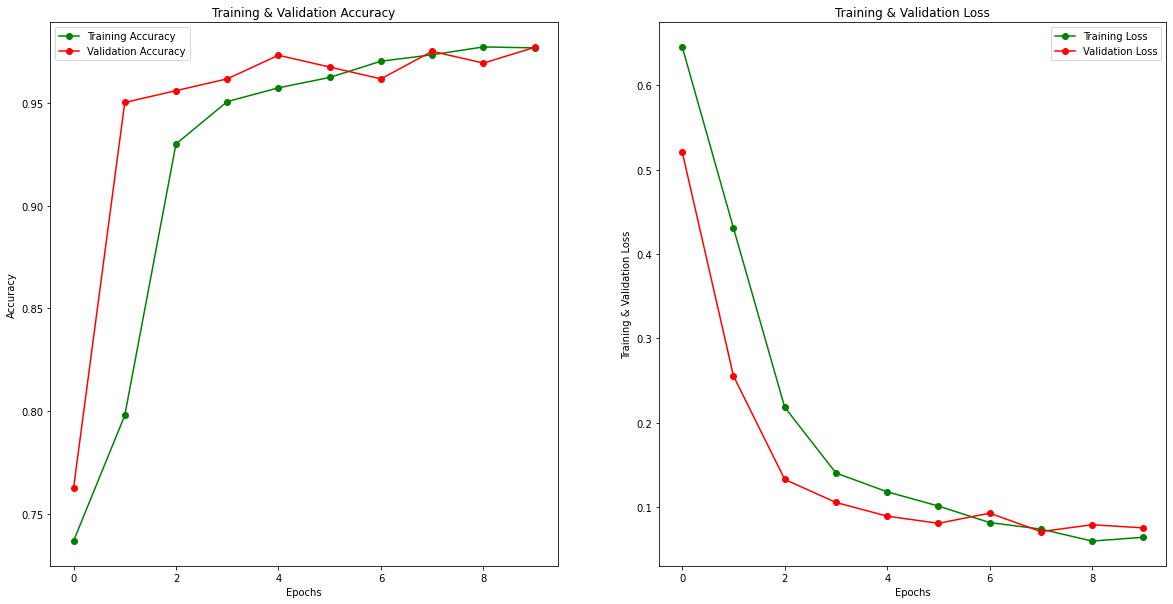

In [17]:
plot_accuracy_loss_chart(history2)

In [18]:
results = model.evaluate(test_images, test_labels)

print("Loss of the model  is - test ", results[0])
print("Accuracy of the model is - test", results[1]*100, "%")


results = model.evaluate(val_images, val_labels)

print("Loss of the model  is - val ", results[0])
print("Accuracy of the model is - val", results[1]*100, "%")

results = model.evaluate(train_images, train_labels)

print("Loss of the model  is - train ", results[0])
print("Accuracy of the model is - train", results[1]*100, "%")

17/17 [==============================] - 2s 143ms/step - loss: 0.0643 - accuracy: 0.9789
Loss of the model  is - test  0.06427470594644547
Accuracy of the model is - test 97.89271950721741 %
17/17 [==============================] - 2s 142ms/step - loss: 0.0753 - accuracy: 0.9770
Loss of the model  is - val  0.07529404014348984
Accuracy of the model is - val 97.7011501789093 %
131/131 [==============================] - 19s 145ms/step - loss: 0.0442 - accuracy: 0.9861
Loss of the model  is - train  0.044249553233385086
Accuracy of the model is - train 98.60978126525879 %


In [19]:
from sklearn.metrics import classification_report

predictions = model.predict(test_images)
predictions = np.argmax(predictions,axis=1)
predictions[:300]

17/17 [==============================] - 3s 145ms/step


array([2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2])

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import pandas as pd

cm = confusion_matrix(test_labels, predictions)
cm = pd.DataFrame(cm, index = ['1', '2'], columns = ['1', '2'])
cm

,1,2
1,133,8
2,3,378


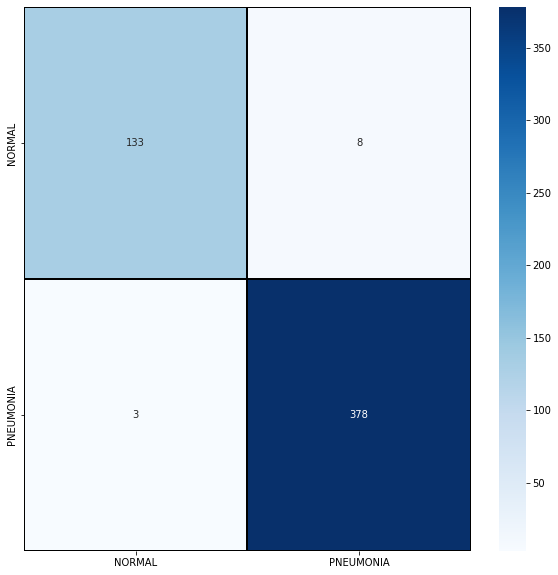

In [38]:
import seaborn as sns
def plot_confusion_matrix (cm):
    plt.figure(figsize = (10,10))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)